This example demonstrates the use of the Box-Cox and Yeo-Johnson transforms through to map data from various distributions to a normal distribution.

----------

此示例演示了使用Box-Cox和Yeo-Johnson变换preprocessing.PowerTransformer将各种分布的数据映射到正态分布。

The power transform is useful as a transformation in modeling problems where homoscedasticity and normality are desired.

-------------

Power transform 可用作需要同方差性和正态性的建模问题的变换。下面是Box-Cox和Yeo-Johnwon应用于六种不同概率分布的例子：Lognormal(对数正态), Chi-squared(卡方), Weibull(威布尔), Gaussian, Uniform, and Bimodal(双峰)。

Note that the transformations successfully map the data to a normal distribution when applied to certain datasets, but are ineffective with others. This highlights the importance of visualizing the data before and after transformation.

---------

请注意，转换在应用于某些数据集时会成功将数据映射到正态分布，但对其他数据集无效。这突出了在转换之前和之后可视化数据的重要性。

Also note that even though Box-Cox seems to perform better than Yeo-Johnson for lognormal and chi-squared distributions, keep in mind that Box-Cox does not support inputs with negative values.

---------------

另请注意，尽管Box-Cox在对数正态分布和卡方分布上的表现似乎优于Yeo-Johnson，但请记住，Box-Cox不支持具有负值的输入。

For comparison, we also add the output from preprocessing.QuantileTransformer. It can force any arbitrary distribution into a gaussian, provided that there are enough training samples (thousands). Because it is a non-parametric method, it is harder to interpret than the parametric ones (Box-Cox and Yeo-Johnson).

----------------

为了比较，我们还添加了输出 preprocessing.QuantileTransformer。只要有足够的训练样本（数千），它就可以强制任意分布为高斯分布。因为它是一种非参数方法，所以它比参数方法（Box-Cox和Yeo-Johnson）更难解释。

On “small” datasets (less than a few hundred points), the quantile transformer is prone to overfitting. The use of the power transform is then recommended.

------------

在“小”数据集（小于几百个点）上，Quantile transformer 易于过度拟合。然后建议使用Power transform。

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [5]:
from sklearn.model_selection import train_test_split

In [41]:
print(__doc__)

N_SAMPLES = 1000
FONT_SIZE = 12
BINS = 30

Automatically created module for IPython interactive environment


In [22]:
rng = np.random.RandomState(666)
bc = PowerTransformer(method ='box-cox')
yj = PowerTransformer(method = 'yeo-johnson')
qt = QuantileTransformer(output_distribution='normal',random_state=rng)
size = (N_SAMPLES,1)

In [9]:
# lognormal distribution
X_lognormal = rng.lognormal(size=size)

In [10]:
# chi-squared distribution
df=3
X_chisq = rng.chisquare(df=df,size=size)

In [11]:
# weibull distribution
a=50
X_weibull = rng.weibull(a=50,size=size)

In [12]:
# gaussian distribution
loc=100
X_gaussian = rng.normal(loc=loc,size=size)

In [13]:
# uniform distribution
X_uniform = rng.uniform(low=0,high=1,size=size)

In [15]:
# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)

In [16]:
# create plots
distributions = [
    ('Lognormal', X_lognormal),
    ('Chi-squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal)
]

In [17]:
colors = ['firebrick', 'darkorange', 'goldenrod',
          'seagreen', 'royalblue', 'darkorchid']

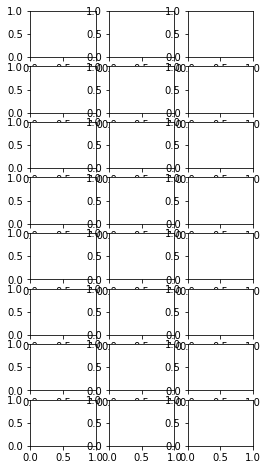

In [18]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
             (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]

In [23]:
for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
            (ax_bc, ax_yj, ax_qt),
            (X_trans_bc, X_trans_yj, X_trans_qt),
            ('Box-Cox', 'Yeo-Johnson', 'Quantile transform'),
            (lmbda_bc, lmbda_yj, None)):
        ax.hist(X_trans, color=color, bins=BINS)
        title = 'After {}'.format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/A/develop/ide/anaconda3/lib/python3.7/s

In [24]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/A/develop/ide/anaconda3/lib/python3.7/s

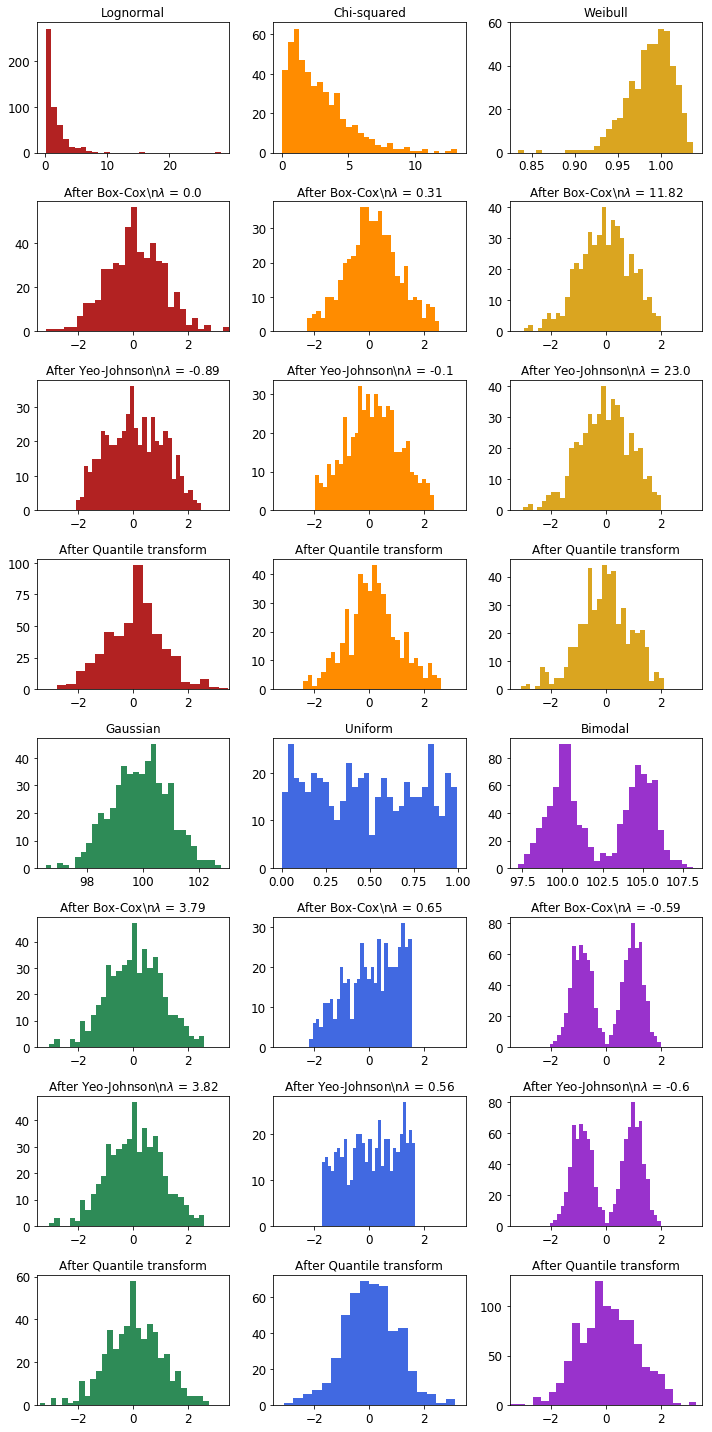

In [42]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10,20))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
             (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
            (ax_bc, ax_yj, ax_qt),
            (X_trans_bc, X_trans_yj, X_trans_qt),
            ('Box-Cox', 'Yeo-Johnson', 'Quantile transform'),
            (lmbda_bc, lmbda_yj, None)):
        ax.hist(X_trans, color=color, bins=BINS)
        title = 'After {}'.format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])

plt.tight_layout()
plt.show()